In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 

In [6]:
#loading csv file
data= pd.read_csv('Folds-one sheet.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 47840


In [7]:
#removing null values
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

In [4]:

data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'RH', 'Output']
data.head()

Avg_Temp  Vacuum  Avg_Pressure     RH  Output
0     14.96   41.76       1024.07  73.17  463.26
1     25.18   62.96       1020.04  59.08  444.37
2      5.11   39.40       1012.16  92.14  488.56
3     20.86   57.32       1010.24  76.64  446.48
4     10.82   37.50       1009.23  96.62  473.90

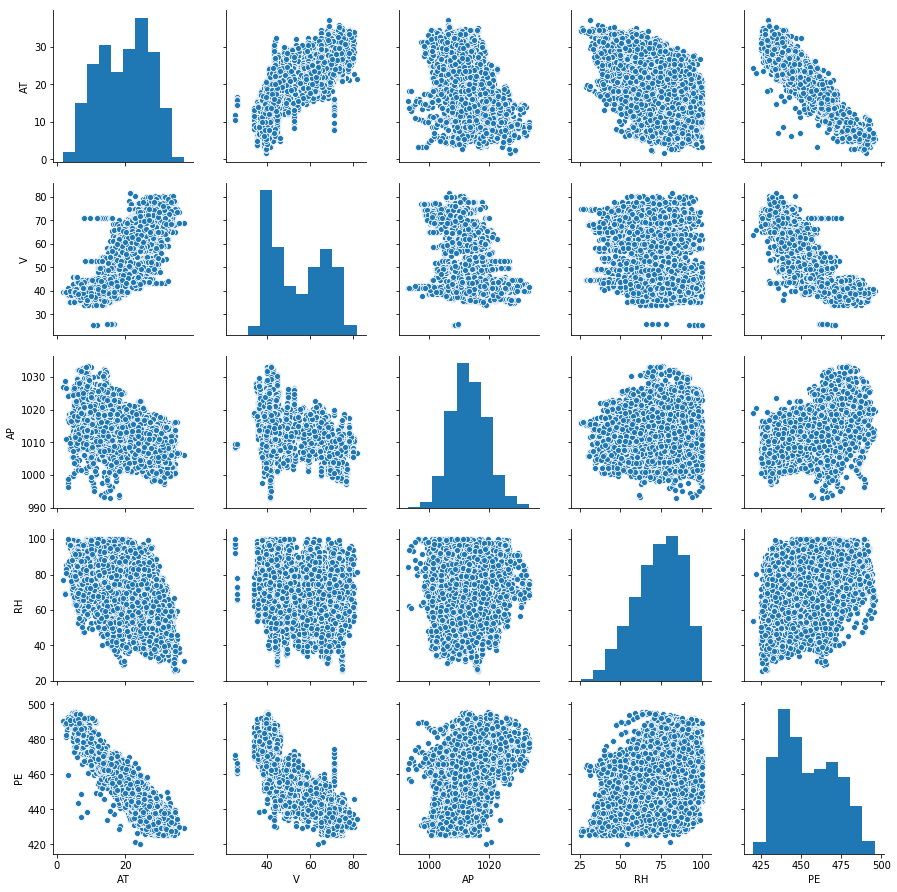

In [9]:
#pairplotting
sb.pairplot(data)

In [10]:
#report, positive output means that x variable has an affect on response
print (data.corr())

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


In [11]:
#selecting avg pressure column to apply linear regression on because it shows positive results above
data_test= data.ix[:,(2,3)].values
data_target= data.ix[:,1].values

data_test_names= ['Avg_Pressure', 'Output']
X, Y= scale(data_test), data

D:\conda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\conda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
missing=X==np.NAN
X[missing==True]

array([], dtype=float64)

In [13]:
#score gives R^2 value. the higher the better
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.score(X,Y))

0.5653752579839946


In [17]:
#selecting humidity column to apply linear regression on because it shows positive results above
data_test= data.ix[:,(2,4)].values
data_target= data.ix[:,1].values

data_test_names= ['Humidity', 'Output']
X, Y= scale(data_test), data

D:\conda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\conda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
missing=X==np.NAN
X[missing==True]

array([], dtype=float64)

In [19]:
#score gives R^2 value. the higher the better
LinReg= LinearRegression(normalize=True)
LinReg.fit(X,Y)
print(LinReg.score(X,Y))

0.706217220584121


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD6A75FD0>]],
      dtype=object)

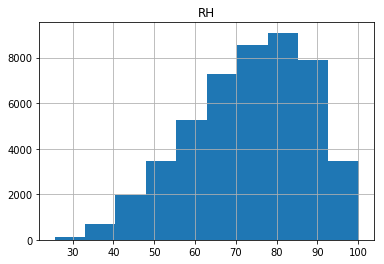

In [21]:
#histogram to see distribution of Humidity
data.hist('RH')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD709D128>]],
      dtype=object)

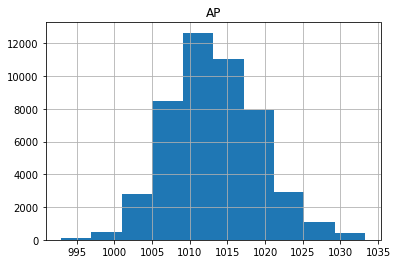

In [27]:
##histogram to see distribution of Pressure
data.hist('AP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD95C9588>]],
      dtype=object)

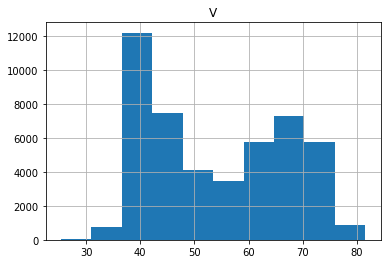

In [28]:
##histogram to see distribution of Vacuum
data.hist('V')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CD95B8EF0>]],
      dtype=object)

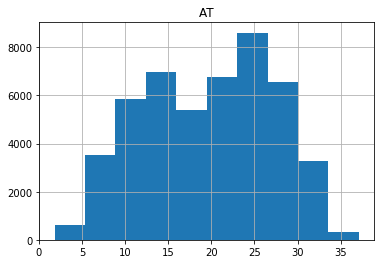

In [29]:
##histogram to see distribution of Temperature
data.hist('AT')